### Import Libs

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Create Individual

In [93]:
def create_individual():
    # TODO: create a random chromosome
    individual = np.random.permutation(8)
    return individual.tolist()

### Generate Population

In [94]:
def generate_population(population_size:int = 20):
    population = []

    for _ in range(population_size):
        new_individual = create_individual()
        population.append(new_individual)
    
    return population

### Score Function

In [95]:
def fitness_score(seq):
    fit_score = 0
    #TODO: calculate fitness score
    n = len(seq)
    non_attacking_pairs = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if seq[i] != seq[j] and abs(seq[i] - seq[j]) != abs(i - j):
                non_attacking_pairs += 1
    
    max_pairs = n * (n - 1) // 2
    fit_score = non_attacking_pairs / max_pairs
    
    return fit_score

### Parent Selection

In [96]:
def tournament_selection(population, fitness_scores, k=3):
    selected = []
    
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitness_scores)), k)
        best_individual = max(tournament, key=lambda x: x[1])[0]
        selected.append(best_individual)
    
    return selected

def parent_selection(population):
    fitness_scores = [fitness_score(individual) for individual in population]
    parents = tournament_selection(population, fitness_scores)
    
    return parents

### Crossover

In [97]:
def one_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
    
    return offspring1, offspring2

def crossover(parents):
    offsprings = []
    num_parents = len(parents)
    
    random.shuffle(parents)
    
    for i in range(0, num_parents, 2):
        parent1 = parents[i]
        parent2 = parents[i + 1] if (i + 1) < num_parents else parents[0]
        
        offspring1, offspring2 = one_point_crossover(parent1, parent2)
        offsprings.append(offspring1)
        offsprings.append(offspring2)
    
    return offsprings

### Mutation

In [98]:
def mutate_sequence(seq):
    mutation_rate=0.1
    if random.random() < mutation_rate:
        pos1 = random.randint(0, len(seq) - 1)
        pos2 = random.randint(0, len(seq) - 1)
        seq[pos1], seq[pos2] = seq[pos2], seq[pos1]
    return seq

def mutate(offsprings):
    for i in range(len(offsprings)):
        offsprings[i] = mutate_sequence(offsprings[i])
    return offsprings

## Calculate Population Fitness

In [99]:
def population_fitness(population):
    population_fitness = 0
    individuals_fitnesses:dict = {}
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        population_fitness += fitness_sc
        temp = tuple(chromosome)
        individuals_fitnesses[temp] = fitness_sc
    return individuals_fitnesses ,population_fitness

### Next Generation Selection

In [100]:
def next_generation_selection(current_population, children_population):
    next_generation = []
    #TODO: choose the next_generation
    combined_population = current_population + children_population
    individuals_fitnesses, _ = population_fitness(combined_population)
    
    sorted_individuals = sorted(individuals_fitnesses.items(), key=lambda item: item[1], reverse=True)
    
    next_generation = [list(individual[0]) for individual in sorted_individuals[:len(current_population)]]
    
    return next_generation   

### Termination Condition

In [101]:
def check_end(population) -> bool:
    #TODO: check end of algorithm
    for individual in population:
        if fitness_score(individual) == 1.0:
            return True
    return False

### Run Your Algorithms

In [108]:
# The genetic algorithm
generation = 0
solution_is_found = False
fitness = []

population = generate_population()
individuals_fitnesses, total_population_fitness = population_fitness(population)

while not check_end(population):
    parents = parent_selection(population)
    offsprings = crossover(parents)
    mutated_offsprings = mutate(offsprings)
    
    individuals_fitnesses, total_population_fitness = population_fitness(mutated_offsprings)
    population = next_generation_selection(population, mutated_offsprings)
    
    generation += 1
    avg_fit = total_population_fitness / len(population)
    fitness.append(avg_fit)


print(f"Solution found in generation {generation}")
solution = []
for individual in population:
    if fitness_score(individual) == 1.0:
        print(individual)
        solution = individual
        break



Solution found in generation 23
[0, 4, 7, 5, 2, 6, 1, 3]


### Show Chess Board

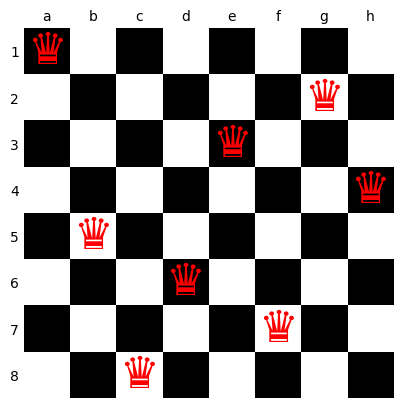

In [109]:
def plot_chessboard(solution):
    board = np.zeros((8, 8, 3))
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1

    fig, ax = plt.subplots()
    ax.imshow(board, extent=[0, 8, 0, 8])

    for col, row in enumerate(solution):
        ax.text(col + 0.5, 7.5 - row, '♛', ha='center', va='center', fontsize=32, color='red')

    ax.set_xticks(np.arange(0.5, 8.5))
    ax.set_yticks(np.arange(0.5, 8.5))
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
    ax.set_yticklabels(np.arange(1, 9)[::-1])
    ax.xaxis.tick_top()

    ax.tick_params(length=0)
    for edge in ['top', 'right', 'bottom', 'left']:
        ax.spines[edge].set_visible(False)

    plt.show()

plot_chessboard(solution)

### See Your Progress Over Generations

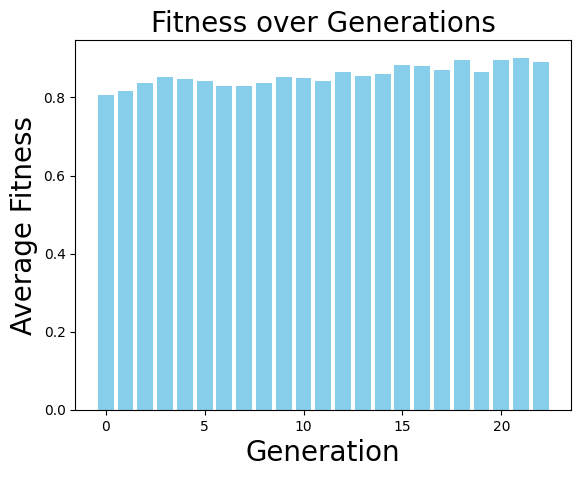

In [110]:
plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()